In [1]:
from rdkit import Chem
from tqdm import tqdm
from serenityff.charge.tree.dash_tree import DASHTree
from serenityff.charge.tree.atom_features import AtomFeatures, get_connection_info_bond_type
%load_ext line_profiler

In [2]:
tree = DASHTree(num_processes=1)
# n=1 19.5
# n=2 30.6
# n=3 31.6

Loading DASH tree data


In [3]:
mol_sup = Chem.SDMolSupplier("../data/example.sdf", removeHs=False)

In [4]:
(1,2,3) == (1,2,4)

False

In [5]:
tree.match_new_atom(0, mol_sup[0])

[34, 0, 167331, 167332, 167333, 169504]

In [6]:
tree.get_molecules_partial_charges(mol_sup[4])["charges"]

[-0.743588904134849,
 1.1309775445707058,
 -0.6724881843055797,
 0.2940594235400035,
 -0.23680232625932834,
 -0.16523398145988805,
 -0.23680232625932834,
 0.33431095702447067,
 -0.6338138301045644,
 -0.004846247250981643,
 -0.48499433858143876,
 0.4956579075462079,
 0.1489313589438346,
 0.1489313589438346,
 0.1489313589438346,
 0.47677022884306663]

In [7]:
AtomFeatures.afKey_2_afTuple[37]

(1, 1, 0, False, 0)

In [8]:
for mol in tqdm(mol_sup, total=len(mol_sup)):
    tree.get_molecules_partial_charges(mol)

100%|██████████| 20/20 [00:00<00:00, 39.16it/s]


In [9]:
%timeit [tree.get_molecules_partial_charges(mol) for mol in mol_sup]

371 ms ± 44.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
# timing baseline (04.09.2023)                                    991 ms ± 67.2 
# timing with AtomFeature changed to tuples                       874 ms ± 210 ms
# timing with precalculated atom features                         515 ms ± 184 ms
# timing with stored neighbor list                                359 ms ± 55.3 ms

In [11]:
tree.get_molecules_partial_charges(mol_sup[4])

{'charges': [-0.743588904134849,
  1.1309775445707058,
  -0.6724881843055797,
  0.2940594235400035,
  -0.23680232625932834,
  -0.16523398145988805,
  -0.23680232625932834,
  0.33431095702447067,
  -0.6338138301045644,
  -0.004846247250981643,
  -0.48499433858143876,
  0.4956579075462079,
  0.1489313589438346,
  0.1489313589438346,
  0.1489313589438346,
  0.47677022884306663],
 'std': [0.01751708984375,
  0.0034885406494140625,
  0.0262298583984375,
  0.09539794921875,
  0.083984375,
  0.043304443359375,
  0.083984375,
  0.046722412109375,
  0.10308837890625,
  0.0889892578125,
  0.022064208984375,
  0.0082550048828125,
  0.01739501953125,
  0.01739501953125,
  0.01739501953125,
  0.0116729736328125],
 'match_depth': [4, 4, 7, 4, 3, 3, 3, 4, 2, 4, 2, 8, 4, 4, 4, 3]}

In [12]:
num_atoms_per_mol = [mol.GetNumAtoms() for mol in mol_sup]
print(f"Average number of atoms per molecule: {sum(num_atoms_per_mol)/len(num_atoms_per_mol)} (min: {min(num_atoms_per_mol)}, max: {max(num_atoms_per_mol)})")

Average number of atoms per molecule: 21.55 (min: 7, max: 31)


In [13]:
tree.data_storage[1]

,level,atom,con,conType,result,stdDeviation,attention,count
0,1,1,-1,-1,0.625488,0.012901,0.596191,10
1,2,70,0,4,0.625488,0.012901,0.379883,10
2,3,65,0,4,0.625488,0.012901,0.170898,10
3,4,70,1,4,0.625488,0.012901,0.003141,10
4,5,55,2,4,0.625488,0.012901,0.002874,10
5,6,33,1,1,0.625488,0.012901,0.002420,10
6,7,1,2,4,0.625488,0.012901,0.002121,10
7,8,34,5,1,0.625488,0.012901,0.002106,10
8,9,33,3,1,0.625488,0.012901,0.002008,10
9,10,34,8,1,0.625488,0.012901,0.001986,10


In [14]:
tree.tree_storage[1]

[(0, 1, -1, -1, 0.5960462093353271, [0, 1]),
 (1, 70, 0, 4, 0.379802405834198, [2]),
 (2, 65, 0, 4, 0.17085446417331696, [3]),
 (3, 70, 1, 4, 0.003141123801469803, [4]),
 (4, 55, 2, 4, 0.002873738994821906, [5]),
 (5, 33, 1, 1, 0.002419679891318083, [6]),
 (6, 1, 2, 4, 0.00212140497751534, [7]),
 (7, 34, 5, 1, 0.0021055617835372686, [8]),
 (8, 33, 3, 1, 0.002008170122280717, [9]),
 (9, 34, 8, 1, 0.0019848933443427086, [10]),
 (10, 31, 6, 1, 0.0019148633582517505, [11]),
 (11, 34, 10, 1, 0.002032126300036907, [12]),
 (12, 34, 10, 1, 0.00198705168440938, [13]),
 (13, 34, 10, 1, 0.0019818239379674196, [14, 15]),
 (14, 27, 4, 4, 0.0018974484410136938, []),
 (15, 26, 4, 4, 0.0018944578478112817, [])]

In [15]:
test_mol = mol_sup[4]

In [16]:
for n in test_mol.GetAtomWithIdx(4).GetNeighbors():
    print(n.GetIdx())

3
5
12


In [17]:
%load_ext line_profiler
%lprun -f tree.get_molecules_partial_charges tree.get_molecules_partial_charges(mol)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-09 s

Total time: 0.0584819 s
File: /home/mlehner/serenityff-charge/serenityff/charge/tree/dash_tree.py
Function: get_molecules_partial_charges at line 285

Line #      Hits         Time  Per Hit   % Time  Line Contents
   285                                               def get_molecules_partial_charges(
   286                                                   self,
   287                                                   mol: Molecule,
   288                                                   norm_method: str = "std_weighted",
   289                                                   max_depth: int = 16,
   290                                                   attention_threshold: float = 10,
   291                                                   attention_incremet_threshold: float = 0,
   292                                                   verbose: bool = False,
   293                                                   default_std_value: float = 0.1,
   294         

In [18]:
%lprun -f tree.match_new_atom tree.match_new_atom(0, mol)

Timer unit: 1e-09 s

Total time: 0.00106091 s
File: /home/mlehner/serenityff-charge/serenityff/charge/tree/dash_tree.py
Function: match_new_atom at line 185

Line #      Hits         Time  Per Hit   % Time  Line Contents
   185                                               def match_new_atom(
   186                                                   self,
   187                                                   atom: int,
   188                                                   mol: Molecule,
   189                                                   max_depth: int = 16,
   190                                                   attention_threshold: float = 10,
   191                                                   attention_increment_threshold: float = 0,
   192                                               ):
   193                                                   """
   194                                                   Match a atom in a molecule to a DASH tree subgraph. The matchi

In [19]:
%lprun -f tree._init_neighbor_dict tree._init_neighbor_dict(mol)

Timer unit: 1e-09 s

Total time: 0.00218729 s
File: /home/mlehner/serenityff-charge/serenityff/charge/tree/dash_tree.py
Function: _init_neighbor_dict at line 149

Line #      Hits         Time  Per Hit   % Time  Line Contents
   149                                               def _init_neighbor_dict(self, mol: Molecule):
   150         1       1785.0   1785.0      0.1          neighbor_dict = {}
   151        27     134814.0   4993.1      6.2          for atom_idx, atom in enumerate(mol.GetAtoms()):
   152        27      98640.0   3653.3      4.5              neighbor_dict[atom_idx] = []
   153        52     102900.0   1978.8      4.7              for neighbor in atom.GetNeighbors():
   154        52    1664918.0  32017.7     76.1                  af_with_connection_info = AtomFeatures.atom_features_from_molecule_w_connection_info(
   155        52      71034.0   1366.0      3.2                      mol, neighbor.GetIdx(), (0, atom_idx)
   156                                         

In [20]:
%lprun -f AtomFeatures.atom_features_from_molecule_w_connection_info AtomFeatures.atom_features_from_molecule_w_connection_info(mol, 1, (0, 0))

Timer unit: 1e-09 s

Total time: 6.0301e-05 s
File: /home/mlehner/serenityff-charge/serenityff/charge/tree/atom_features.py
Function: atom_features_from_molecule_w_connection_info at line 217

Line #      Hits         Time  Per Hit   % Time  Line Contents
   217                                               @staticmethod
   218                                               def atom_features_from_molecule_w_connection_info(
   219                                                   molecule: Molecule, index: int, connected_to: Tuple[Any] = (-1, -1)
   220                                               ) -> int:
   221         1        151.0    151.0      0.3          connected_bond_type = (
   222         1      31638.0  31638.0     52.5              -1 if connected_to[1] == -1 else get_connection_info_bond_type(molecule, int(index), int(connected_to[1]))
   223                                                   )
   224         1      28173.0  28173.0     46.7          key = AtomFeatures.a

In [21]:
%lprun -f get_connection_info_bond_type get_connection_info_bond_type(mol, 1, 0)


Timer unit: 1e-09 s

Total time: 3.3462e-05 s
File: /home/mlehner/serenityff-charge/serenityff/charge/tree/atom_features.py
Function: get_connection_info_bond_type at line 15

Line #      Hits         Time  Per Hit   % Time  Line Contents
    15                                           def get_connection_info_bond_type(molecule: Molecule, index: int, connected_to: int) -> int:
    16         1      23536.0  23536.0     70.3      bond = molecule.GetBondBetweenAtoms(int(index), int(connected_to))
    17         1        409.0    409.0      1.2      if bond is None:
    18                                                   return -1
    19         1       3020.0   3020.0      9.0      elif bond.GetIsConjugated():
    20                                                   return 4
    21                                               else:
    22         1       6497.0   6497.0     19.4          return int(bond.GetBondType())

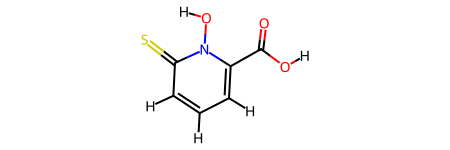

In [22]:
test_mol

In [23]:
Chem.rdmolops.GetAdjacencyMatrix(test_mol, useBO=True)

array([[0. , 2. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. ],
       [2. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ,
        0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 1.5, 0. , 0. , 0. , 0. , 1.5, 0. , 0. , 0. ,
        0. , 0. , 0. ],
       [0. , 0. , 0. , 1.5, 0. , 1.5, 0. , 0. , 0. , 0. , 0. , 0. , 1. ,
        0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1.5, 0. , 1.5, 0. , 0. , 0. , 0. , 0. , 0. ,
        1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1.5, 0. , 1.5, 0. , 0. , 0. , 0. , 0. ,
        0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1.5, 0. , 2. , 1.5, 0. , 0. , 0. ,
        0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 2. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. ],
       [0. , 0. , 0. , 1.5, 0. , 0. , 0. , 1.5, 0. , 0. , 1. , 0. , 0. ,
        0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.